In [1]:
from typing_extensions import TypedDict
from typing import Literal

class TypeDictState(TypedDict):
    name:str
    game:Literal["cricket","badminton"]

In [12]:
def play_game(state:TypeDictState):
    print("----Play Game node has been called----")
    return {"name":state['name'] + " want to play "}

def cricket(state:TypeDictState):
    print("----Cricket node has been called----")
    return{"name":state['name']+ "cricket","game":"cricket"}

def badminton(state:TypeDictState):
    print("----Badminton node has been called----")
    return{"name":state['name']+ "badminton", "game":"badminton"}


In [13]:
import random

In [14]:
def decide_play(state:TypeDictState)->Literal["cricket", "badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

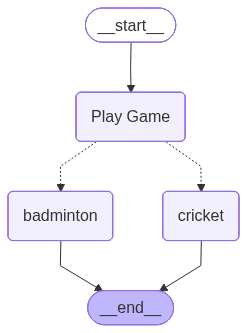

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph , START , END

builder = StateGraph(TypeDictState)
builder.add_node("Play Game",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

#Flow
builder.add_edge(START , "Play Game")
builder.add_conditional_edges("Play Game",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"name":"Neel"}) #Here we dont have to follow strict commands to insert string for typeDict 

----Play Game node has been called----
----Badminton node has been called----


{'name': 'Neel want to play badminton', 'game': 'badminton'}

In [19]:
#DataClass

from dataclasses import dataclass


@dataclass
class DataClassState:
    name:str
    game:Literal["badminton", "cricket"]

In [20]:
def play_game(state:DataClassState):
    print("----Play Game node has been called----")
    return {"name":state.name + " want to play "}

def cricket(state:DataClassState):
    print("----Cricket node has been called----")
    return{"name":state.name+ "cricket","game":"cricket"}

def badminton(state:DataClassState):
    print("----Badminton node has been called----")
    return{"name":state.name+ "badminton", "game":"badminton"}


In [21]:
def decide_play(state:DataClassState)->Literal["cricket", "badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

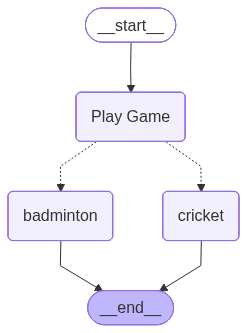

In [22]:
from IPython.display import Image, display
from langgraph.graph import StateGraph , START , END

builder = StateGraph(DataClassState)
builder.add_node("Play Game",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

#Flow
builder.add_edge(START , "Play Game")
builder.add_conditional_edges("Play Game",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
graph.invoke(DataClassState(name="Neel",game="cricket"))

----Play Game node has been called----
----Badminton node has been called----


{'name': 'Neel want to play badminton', 'game': 'badminton'}